In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.pandas.set_option('display.max_columns',None)

In [2]:
df_train=pd.read_csv('train.csv')


In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.shape

(8693, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
df_train['Cabin'].value_counts()

G/734/S     8
G/1368/P    7
G/109/P     7
B/11/S      7
C/137/S     7
           ..
C/282/S     1
F/1740/P    1
G/771/S     1
D/242/S     1
F/490/P     1
Name: Cabin, Length: 6560, dtype: int64

In [12]:
df_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
df_train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
# Numerical features
Numerical_feature=[feature for feature in df_train.columns if df_train[feature].dtype!='O' and df_train[feature].dtype!='bool']

In [15]:
Numerical_feature

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [16]:
# categorical features
Categorical_feature=[feature for feature in df_train.columns if df_train[feature].dtype=='O']

In [17]:
Categorical_feature

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [18]:
# handling categorical data missing value
for feature  in Categorical_feature:    
    df_train[feature].fillna(df_train[feature].mode()[0], inplace=True)

In [19]:

df_train['HomePlanet'].mode()[0]

'Earth'

In [20]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64

In [21]:
Numerical_feature

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [22]:
df_train.duplicated().sum()

0

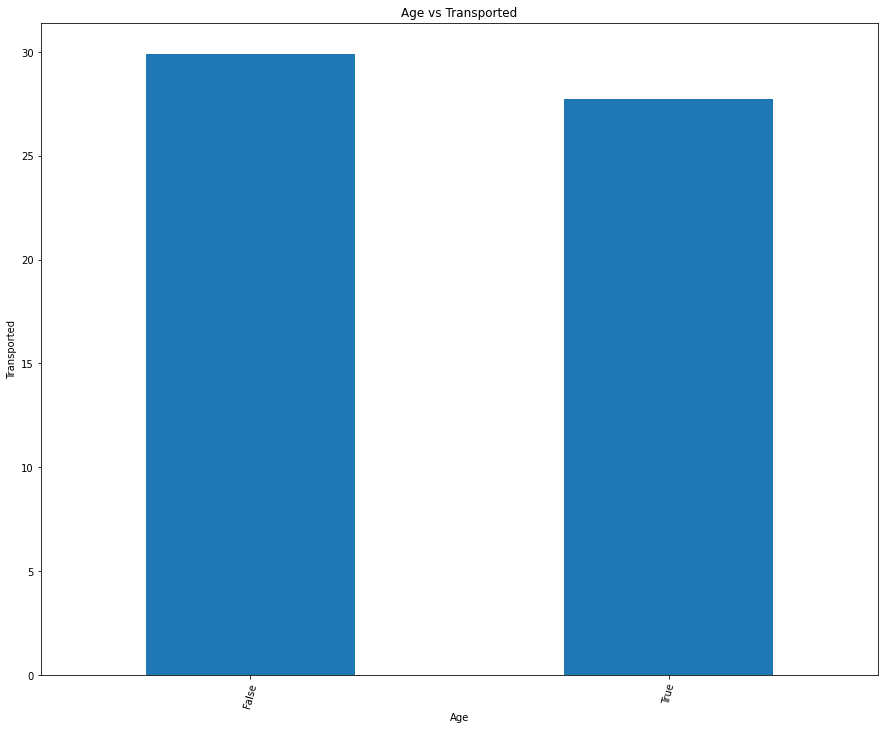

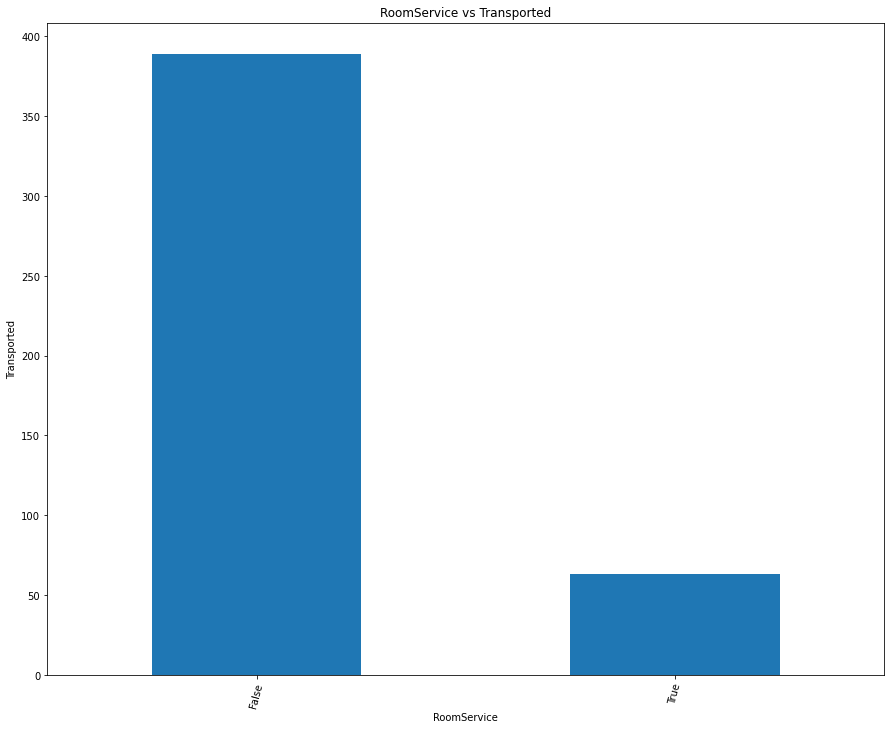

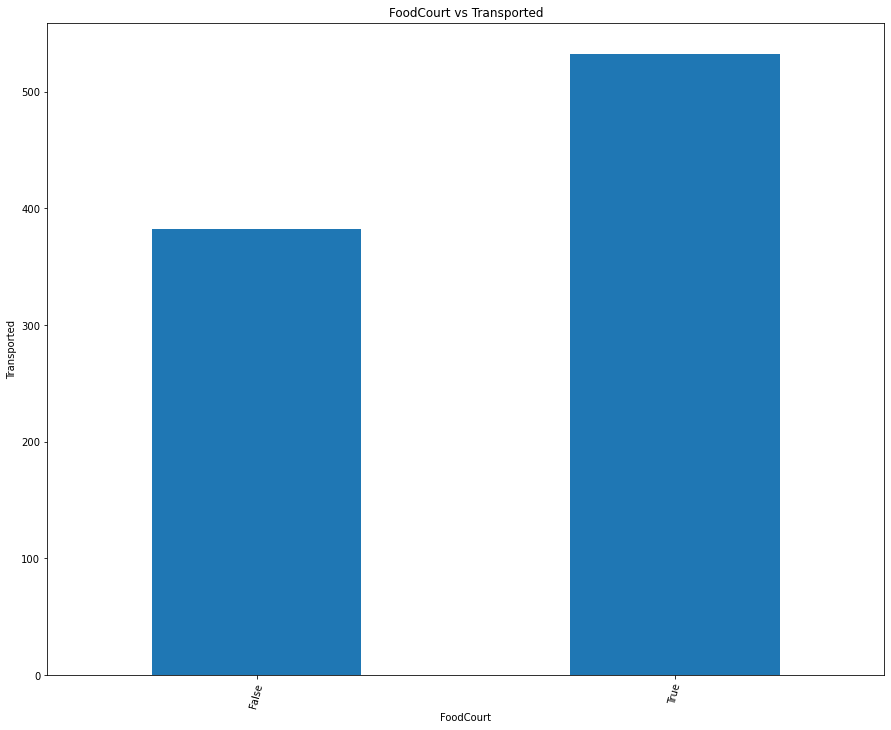

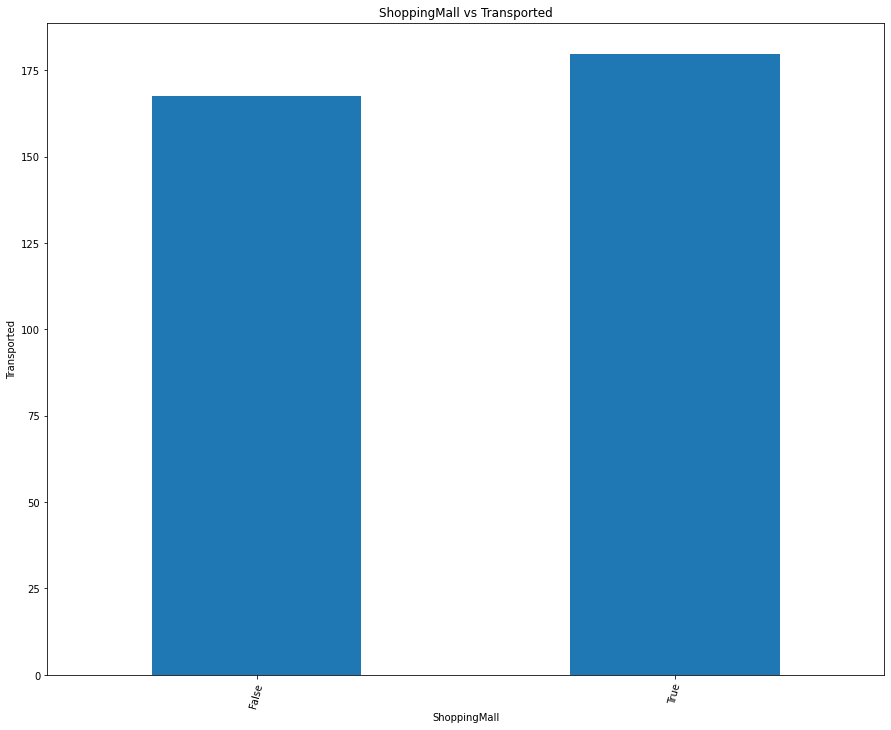

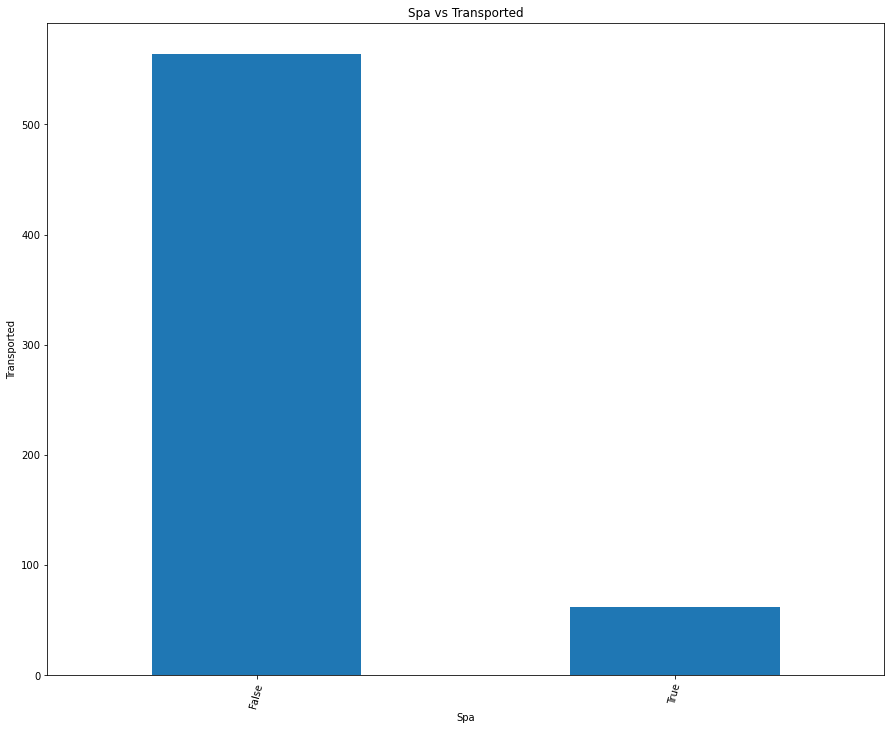

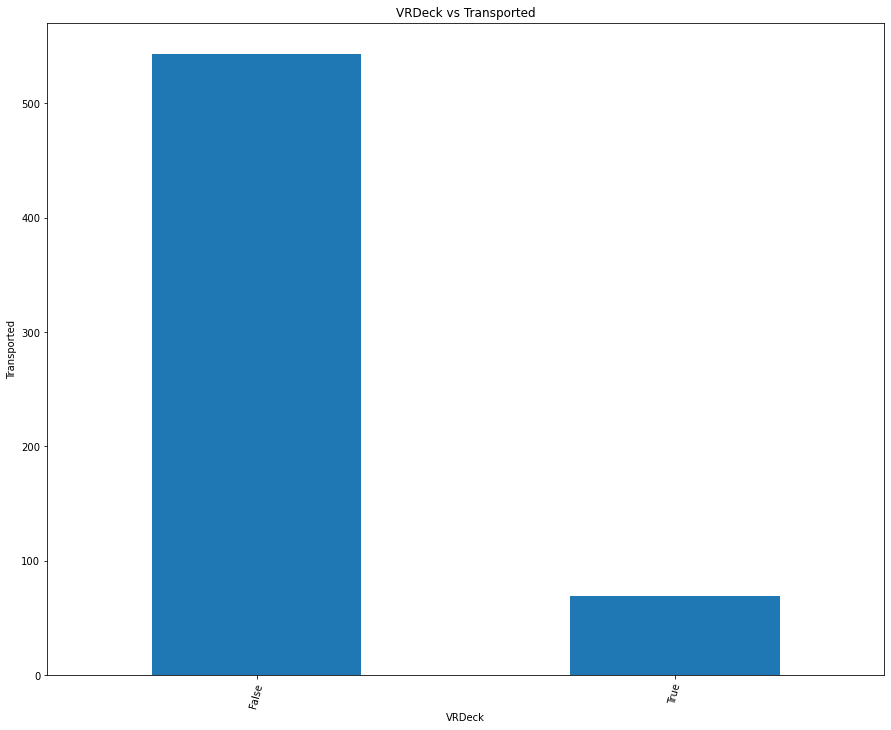

In [23]:
for feature in Numerical_feature:
    plt.figure(figsize=(15,12))
    df_train.groupby('Transported')[feature].mean().plot(kind='bar')
    plt.xticks(rotation = 75)
    plt.xlabel(feature)
    plt.ylabel('Transported')
    plt.title(f'{feature} vs Transported')
    plt.show()

In [24]:
df_train['Age'].median()

27.0

In [25]:
## Handling numerical data missing value
for feature in Numerical_feature:
    df_train[feature].fillna(df_train[feature].median(),inplace=True)

In [26]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [27]:
Categorical_feature.remove('PassengerId')
Categorical_feature.pop()

'Name'

In [28]:
Categorical_feature

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [29]:
## Fetching unique values from categorical features
for feature in Categorical_feature:
    print(f'{feature} unique count is: {df_train[feature].nunique()}')

HomePlanet unique count is: 3
CryoSleep unique count is: 2
Cabin unique count is: 6560
Destination unique count is: 3
VIP unique count is: 2


In [30]:
df_train['HomePlanet'].nunique()

3

In [31]:
## Converting boolean value to integer
df_train['Transported']=df_train['Transported'].astype(int)
df_train['VIP']=df_train['VIP'].astype(int)
df_train['CryoSleep']=df_train['CryoSleep'].astype(int)

In [32]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [33]:
## For cabin column we are splitting data to 3 new features
df_train[['Cabin_compartment', 'Cabin_seatnumber','Cabin_Speciality']] = df_train["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))

In [34]:
df_train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_compartment,Cabin_seatnumber,Cabin_Speciality
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S
8692,9280_02,Europa,0,E/608/S,TRAPPIST-1e,44.0,0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,1,E,608,S


In [35]:
index=df_train['PassengerId']

In [36]:
## Here we are droping few columns which not require
df_train.drop(['Cabin','Name','PassengerId','Cabin_seatnumber'],axis=1,inplace=True)

In [37]:
df_train['Cabin_compartment'].nunique()

8

In [38]:
df_train['Cabin_Speciality'].nunique()

2

In [39]:
df_train.groupby('VIP')['Transported'].mean()

VIP
0    0.506475
1    0.381910
Name: Transported, dtype: float64

In [40]:
df_train.groupby('Cabin_compartment')['Transported'].mean()

Cabin_compartment
A    0.496094
B    0.734275
C    0.680054
D    0.433054
E    0.357306
F    0.439871
G    0.515228
T    0.200000
Name: Transported, dtype: float64

In [41]:
df_train.groupby('Cabin_Speciality')['Transported'].mean()

Cabin_Speciality
P    0.451260
S    0.552708
Name: Transported, dtype: float64

In [42]:
data=df_train.copy()

In [43]:
df_train['cabincomspe']=df_train['Cabin_compartment']+df_train['Cabin_Speciality']

In [44]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_compartment,Cabin_Speciality
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S


In [45]:
df_train.drop(['Cabin_compartment','Cabin_Speciality'],axis=1,inplace=True)

In [46]:
df_train.shape

(8693, 12)

In [47]:
df_train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
cabincomspe     0
dtype: int64

In [48]:
## encoding few categorical column 
data_df=pd.get_dummies(df_train,drop_first=True)#,columns=['HomePlanet','CryoSleep','Destination','VIP','cabincomspe'])

In [49]:
data_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,...,cabincomspe_DP,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
data_df.shape

(8693, 28)

In [51]:
data_df['PassengerId']=index

In [52]:
data_df.tail()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,...,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS,PassengerId
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,...,0,0,0,0,0,0,0,0,0,9276_01
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,9278_01
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,9279_01
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,...,0,0,1,0,0,0,0,0,0,9280_01
8692,0,44.0,0,126.0,4688.0,0.0,0.0,12.0,1,1,...,0,0,1,0,0,0,0,0,0,9280_02


In [53]:
data_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'cabincomspe_AS', 'cabincomspe_BP', 'cabincomspe_BS', 'cabincomspe_CP',
       'cabincomspe_CS', 'cabincomspe_DP', 'cabincomspe_DS', 'cabincomspe_EP',
       'cabincomspe_ES', 'cabincomspe_FP', 'cabincomspe_FS', 'cabincomspe_GP',
       'cabincomspe_GS', 'cabincomspe_TP', 'cabincomspe_TS', 'PassengerId'],
      dtype='object')

In [54]:
test_df=pd.read_csv('editedtest.csv')

In [55]:
test_df.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
#final_df=pd.concat([data_df,test_df],axis=0,ignore_index=False)

In [57]:
## merging both test and train data
final_df=pd.concat([data_df,test_df],axis=0)

In [58]:
final_df.to_csv('final.csv',index=True)

In [59]:
final_df.tail()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,...,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS,PassengerId
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,...,0,0,0,0,0,0,1,0,0,9266_02
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,NaN,0,...,0,0,0,0,0,1,0,0,0,9269_01
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,...,0,0,0,0,0,0,0,0,0,9271_01
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,NaN,1,...,0,0,0,0,0,0,0,0,0,9273_01
4276,1,43.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,...,0,0,0,0,0,0,1,0,0,9277_01


In [60]:
final_df.shape

(12970, 29)

In [61]:
last_df=final_df.copy()

In [62]:
final_df.index=final_df['PassengerId']

In [63]:
final_df.drop('PassengerId',axis=1,inplace=True)

In [64]:
final_df.shape

(12970, 28)

In [65]:
x_test=test_df[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'cabincomspe_AS', 'cabincomspe_BP', 'cabincomspe_BS', 'cabincomspe_CP',
       'cabincomspe_CS', 'cabincomspe_DP', 'cabincomspe_DS', 'cabincomspe_EP',
       'cabincomspe_ES', 'cabincomspe_FP', 'cabincomspe_FS', 'cabincomspe_GP',
       'cabincomspe_GS', 'cabincomspe_TP', 'cabincomspe_TS','PassengerId']]

In [66]:
data_df.index=data_df['PassengerId']

In [67]:
x_train=data_df.drop(['Transported','PassengerId'],axis=1)
y_train=data_df['Transported']

In [68]:
x_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,cabincomspe_DP,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,...,0,0,0,0,0,1,0,0,0,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,...,0,0,0,0,0,0,0,0,0,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,...,0,0,0,0,0,0,0,0,0,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
x_train.shape

(8693, 27)

In [70]:
x_test.index=x_test['PassengerId']
x_test.drop('PassengerId',axis=1,inplace=True)

In [71]:
x_test.shape

(4277, 27)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=0)

In [73]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((6085, 27), (2608, 27), (2608,), (6085,))

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)


In [75]:
x_test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'cabincomspe_AS', 'cabincomspe_BP', 'cabincomspe_BS', 'cabincomspe_CP',
       'cabincomspe_CS', 'cabincomspe_DP', 'cabincomspe_DS', 'cabincomspe_EP',
       'cabincomspe_ES', 'cabincomspe_FP', 'cabincomspe_FS', 'cabincomspe_GP',
       'cabincomspe_GS', 'cabincomspe_TP', 'cabincomspe_TS'],
      dtype='object')

In [76]:
x_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'cabincomspe_AS', 'cabincomspe_BP', 'cabincomspe_BS', 'cabincomspe_CP',
       'cabincomspe_CS', 'cabincomspe_DP', 'cabincomspe_DS', 'cabincomspe_EP',
       'cabincomspe_ES', 'cabincomspe_FP', 'cabincomspe_FS', 'cabincomspe_GP',
       'cabincomspe_GS', 'cabincomspe_TP', 'cabincomspe_TS'],
      dtype='object')

In [77]:
prediction=rf_classifier.predict(X_test)

In [78]:
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [79]:
## Hyper Parameter
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7,9,12,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [80]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### ntier==how many time iteration happen
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80000261 0.79835879 0.79934604 0.79260737 0.797045   0.79934596
 0.7916215  0.79063523 0.79688104        nan 0.79737252 0.7955662
 0.79622293 0.79819515 0.79359389 0.79950959 0.79901682 0.78471872
 0.79523706 0.79852372 0.79572935 0.7967153  0.79441556 0.79819499
        nan        nan 0.7950727  0.79622325        nan 0.79753721
 0.79671554 0.79655158 0.78767689 0.79408658 0.79589396 0.79770149
 0.79868793 0.78438958 0.78751228        nan        nan 0.79803087
 0.79720888 0.78389673 0.79688031        nan 0.7972092         nan
 0.796717   0.79753769        nan 0.79720856 0.79375801 0.79375793
 0.796058   0.79786594 0.79770125 0.79260721 0.79885229 0.79819515
 0.79605865 0.79704549 0.78751204        nan 0.79589347 0.79260721
 0.79687999 0.79720872 0.7985234  0.78570499 0.79572959 0.79589355
        nan 0.79375737 0.7829111         nan 0.7988529

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9, 12, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
           

In [81]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [82]:
best_random_grid=rf_randomcv.best_params_

In [83]:
best_random_grid

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [84]:
y_pred=rf_randomcv.predict(x_test)

In [85]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [93]:
x_test['Transported']=y_pred

In [87]:
x_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS,Transported
PassengerId,,,,,,,,,,,,,,,,,,,,,
9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1
9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,0,0,...,0,0,0,0,0,1,0,0,0,0
9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,1,0,...,0,0,0,0,0,0,0,0,0,1
9277_01,1,43.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [96]:
x_test['Transported']=x_test['Transported'].astype(bool)

In [92]:
sub_df=pd.read_csv('ptest.csv')
#sub_df=sub_df[['PassengerId']]
sub_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,...,cabincomspe_DP,cabincomspe_DS,cabincomspe_EP,cabincomspe_ES,cabincomspe_FP,cabincomspe_FS,cabincomspe_GP,cabincomspe_GS,cabincomspe_TP,cabincomspe_TS
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,...,0,0,0,0,0,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [97]:
x_test['PassengerId']=x_test.index

In [98]:
pred=x_test[['PassengerId','Transported']]

In [99]:

pred.head()

,PassengerId,Transported
PassengerId,,
0013_01,0013_01,True
0018_01,0018_01,False
0019_01,0019_01,True
0021_01,0021_01,True
0023_01,0023_01,False


In [100]:
pred.to_csv('sample_submission.csv',index=False)

In [105]:
## Preparing data for submission in kaggle
pred1=pd.DataFrame(prediction)
#sub_df=pd.read_csv('sample_submission1.csv')
datasets=pd.concat([pred['PassengerId'],pred2[0]],axis=1)
datasets.columns=['PassengerId','Transported']
datasets.to_csv('sample_submission1.csv',index=False)

In [103]:
pred2=pd.DataFrame(pred1.astype(bool))
pred2[0]

0        True
1        True
2       False
3       False
4        True
        ...  
2603     True
2604     True
2605     True
2606    False
2607    False
Name: 0, Length: 2608, dtype: bool

In [106]:
datasets.head()

,PassengerId,Transported
0013_01,0013_01,NaN
0018_01,0018_01,NaN
0019_01,0019_01,NaN
0021_01,0021_01,NaN
0023_01,0023_01,NaN


In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[1071  232]
 [ 317  988]]
0.7894938650306749
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1303
           1       0.81      0.76      0.78      1305

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

